In [1]:
from bs4 import BeautifulSoup
from DataProcessing.Utils import *
import mdtraj as md
import os

import os
import numpy as np
import mdtraj as md
import MDAnalysis as mda
from MDAnalysis.analysis import nuclinfo
from MDAnalysis import *
import matplotlib.pyplot as plt

In [2]:
def get_input_data(RNA_id, Mg2, temperature, rep_id, run_group=1, path='/scratch/zheng.hua1/processed'):
    if rep_id == 0:
        rep_id = ''
        dcd_path = os.path.join(path, 'RNA{0}-Mg{1}-NEW/simulation_result'.format(run_group, Mg2),
                                'output_{}_MG{}_temperature{}/{}_trajectory.dcd'.format(RNA_id, Mg2, temperature, RNA_id))
    else:
        dcd_path = os.path.join(path, 'RNA{0}-Mg{1}-NEW/simulation_result'.format(run_group, Mg2),
                                'output_{}_MG{}_temperature{}/{}_trajectory.dcd_{}'.format(RNA_id, Mg2, temperature, RNA_id, rep_id))
    
    try:
        t = md.load_dcd(dcd_path, top='/scratch/zheng.hua1/processed/processed-MG{}-CL/{}.OpenSMOG.AA+custom+ions.MGKCL.gro'.format(Mg2, RNA_id))
    except:
        return
    t_RNA = t.remove_solvent()
    atom_dict = md.geometry.dihedral._construct_atom_dict(t_RNA.topology)[0]
    for i in atom_dict.keys():
        for name in [i for i in list(atom_dict[i].keys())]:
            j = atom_dict[i][name]
            if "*" in name:
                del atom_dict[i][name]
                atom_dict[i][name.replace("*", "\'")] = j
    
    C1_atoms = [atom["C1'"] for i, atom in atom_dict.items()]
    contacts, contact_matrix = get_atom2residue2(t_RNA, RNA_id, Mg2, rep_id, False, path)
    # pairs = [[i, j] for i in range(t_RNA.n_residues) for j in range(t_RNA.n_residues)]
    # dis_matrix, index_pair = md.compute_contacts(t_RNA, pairs)
    # dis_matrix = dis_matrix.reshape(dis_matrix.shape[0], t_RNA.n_residues, t_RNA.n_residues)
    residue_type = [r.name[:1] for r in t_RNA.topology.residues]
    return t_RNA.xyz[:,C1_atoms,:], residue_type, contacts, contact_matrix

def get_input_data_from_traj(t_RNA, Mg2=0.1, RNA_id='1Y26'):
    import copy
    t_RNA = t.remove_solvent()
    atom_dict = md.geometry.dihedral._construct_atom_dict(t_RNA.topology)[0]
    atom_keys = copy.deepcopy(set(atom_dict.keys()))
    for i in atom_keys:
        if i > 70:
            del atom_dict[i]
            continue
        for name in [i for i in list(atom_dict[i].keys())]:
            j = atom_dict[i][name]
            if "*" in name:
                del atom_dict[i][name]
                atom_dict[i][name.replace("*", "\'")] = j
    
    C1_atoms = [atom["C1'"] for i, atom in atom_dict.items()]
    contacts, contact_matrix = get_atom2residue2(t_RNA, RNA_id, Mg2, rep_id, True)
    residue_type = [r.name[:1] for r in t_RNA.topology.residues if r.resSeq <= 71]
    return t_RNA.xyz[:,C1_atoms,:], residue_type, contacts, contact_matrix

In [3]:
Mg2_list = [0.1, 1, 10]
# temperatures = [0.5, 0.6, 0.7, 0.8]
temperatures = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
list_of_seqs_1 = ["157D", "1SA9", "1DQH", "1OSU", "1CSL", "1KD5", "1I9X"] # 1OSU 387D 361D 480D
list_of_seqs_2 = ["353D", "387D", "361D", "3CJZ"] # ["2V7R", "2VUQ", "2XSL", "353D", "387D", "361D", "3CJZ"]
list_of_seqs = ['1ATO', '2LPS', '2KPV','1RFR','1I4C', '1F6X', '1L1W', '2LP9','2JTP', '2KVN', '2RVO','387D', '480D'] #+ list_of_seqs_1


residues = []
temperature_data = []
Mg2_data = []
location = []
contact_matrix_list = []
contacts_list = []
seq_code = []

for RNA_id in list_of_seqs:
    for Mg2 in Mg2_list:
        for temperature in temperatures:
            for rep_id in range(10):
                print("RNA_id: {}, Mg2+: {}, Temperature: {}, replication id: {}".format(RNA_id, Mg2, temperature, rep_id))
                try:
                    xyz, residue_type, contacts, contact_matrix \
                      = get_input_data(RNA_id, Mg2, temperature, rep_id, 1)
                except:
                    print("get_input_data failed")
                    continue
                location.append(xyz[:1001:2, :, :])
                residues.append(residue_type)
                temperature_data.append(temperature)
                Mg2_data.append(Mg2 / 10)
                seq_code.append(RNA_id)
                contact_matrix_list.append(contact_matrix)
                contacts_list.append(contacts)

RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.5, replication id: 0
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.5, replication id: 1
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.5, replication id: 2
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.5, replication id: 3
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.5, replication id: 4
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.5, replication id: 5
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.5, replication id: 6
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.5, replication id: 7
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.5, replication id: 8
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.5, replication id: 9
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.6, replication id: 0
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.6, replication id: 1
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.6, replication id: 2
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.6, replication id: 3
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.6, replication id: 4
RNA_id: 1ATO, Mg2+: 0.1, Temperature: 0.6, replication id: 5
RNA_id: 1ATO, Mg2+: 0.1,

In [4]:
# temperatures = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
for temperature in temperatures:
    for rep_id in range(1, 21):
        print("Ailun's Simulation, Temperature: {}, Replication id: {}".format(temperature, rep_id))
        dcd_path = '/scratch/whitford/A-riboswitch/K50Mg{}/temp_{}/REP{}/A-riboswitch_opensmog_pbc_trajectory.dcd'.format("0.10", temperature, rep_id)
        t = md.load_dcd(dcd_path, top='/scratch/whitford/A-riboswitch/K50Mg{0}/temp_{1}/system/A-ribo_opensmog.Mg{0}.mgkcl.gro'.format("0.10", temperature))
        xyz, residue_type, contacts, contact_matrix =  get_input_data_from_traj(t)
        location.append(xyz[:1001:2, :, :])
        residues.append(residue_type)
        temperature_data.append(temperature)
        Mg2_data.append(Mg2/10)
        seq_code.append('1Y26')
        contact_matrix_list.append(contact_matrix)
        contacts_list.append(contacts)

Ailun's Simulation, Temperature: 0.5, Replication id: 1
Ailun's Simulation, Temperature: 0.5, Replication id: 2
Ailun's Simulation, Temperature: 0.5, Replication id: 3
Ailun's Simulation, Temperature: 0.5, Replication id: 4
Ailun's Simulation, Temperature: 0.5, Replication id: 5
Ailun's Simulation, Temperature: 0.5, Replication id: 6
Ailun's Simulation, Temperature: 0.5, Replication id: 7
Ailun's Simulation, Temperature: 0.5, Replication id: 8
Ailun's Simulation, Temperature: 0.5, Replication id: 9
Ailun's Simulation, Temperature: 0.5, Replication id: 10
Ailun's Simulation, Temperature: 0.5, Replication id: 11
Ailun's Simulation, Temperature: 0.5, Replication id: 12
Ailun's Simulation, Temperature: 0.5, Replication id: 13
Ailun's Simulation, Temperature: 0.5, Replication id: 14
Ailun's Simulation, Temperature: 0.5, Replication id: 15
Ailun's Simulation, Temperature: 0.5, Replication id: 16
Ailun's Simulation, Temperature: 0.5, Replication id: 17
Ailun's Simulation, Temperature: 0.5, Re

In [14]:
import pickle
path = "/home/zheng.hua1/MD-simulation"

with open(os.path.join(path, 'residues.pkl'), 'wb') as file:
    pickle.dump(residues, file, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(path, 'temperature_data.pkl'), 'wb') as file:
    pickle.dump(temperature_data, file, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(path, 'Mg2_data.pkl'), 'wb') as file:
    pickle.dump(Mg2_data, file, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(path, 'location.pkl'), 'wb') as file:
    pickle.dump(location, file, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(path, 'contact_matrix.pkl'), 'wb') as file:
    pickle.dump(contact_matrix_list, file, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(path, 'contacts.pkl'), 'wb') as file:
    pickle.dump(contacts_list, file, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(path, 'seq_code.pkl'), 'wb') as file:
    pickle.dump(seq_code, file, pickle.HIGHEST_PROTOCOL)

In [169]:
import pandas as pd
def soft_cut_q(dis_matrix, dis_matrix0, contact):
    BETA_CONST = 50   # 1/nm
    LAMBDA_CONST = 1.2
    NATIVE_CUTOFF = 4 # nanometers
    # boolean_ind = get_unique_contact_mask(contact, len(dis_matrix))
    indices = pd.DataFrame(contact).drop_duplicates().to_numpy()
    boolean_ind = torch.zeros_like(dis_matrix, dtype=bool)
    for i, j in indices:
        if abs(i - j) > 1:
            boolean_ind[i, j] = True
    r = dis_matrix[boolean_ind]
    r0 = dis_matrix0[boolean_ind]
    Q = 1.0 / (1 + np.exp(BETA_CONST * (r - LAMBDA_CONST * r0)))
    return Q

def get_unique_contact_mask(contact, max_len):
    indices = pd.DataFrame(contact).drop_duplicates().to_numpy()
    boolean_ind = torch.zeros((max_len, max_len), dtype=bool)
    for i, j in indices:
        if abs(i - j) > 1:
            boolean_ind[i, j] = True
    return boolean_ind

temperatures = [0.5, 0.7,0.9, 1.0, 1.2]
temperature = 1.2
loc_tem = {}
con_tem = {}
for temperature in temperatures:
    locations = []
    contacts_list = []
    for rep_id in range(1, 21):
        print("Ailun's Simulation, Temperature: {}, Replication id: {}".format(temperature, rep_id))
        dcd_path = '/scratch/whitford/A-riboswitch/K50Mg{}/temp_{}/REP{}/A-riboswitch_opensmog_pbc_trajectory.dcd'.format("0.10", temperature, rep_id)
        t = md.load_dcd(dcd_path, top='/scratch/whitford/A-riboswitch/K50Mg{0}/temp_{1}/system/A-ribo_opensmog.Mg{0}.mgkcl.gro'.format("0.10", temperature))
        xyz, residue_type, contacts, contact_matrix =  get_input_data_from_traj(t)
        locations.append(xyz[:1001:5, :, :])
        contacts_list.append(contacts)
    loc_tem[temperature] = locations
    con_tem[temperature] = contacts_list

Ailun's Simulation, Temperature: 0.5, Replication id: 1
Ailun's Simulation, Temperature: 0.5, Replication id: 2
Ailun's Simulation, Temperature: 0.5, Replication id: 3
Ailun's Simulation, Temperature: 0.5, Replication id: 4
Ailun's Simulation, Temperature: 0.5, Replication id: 5
Ailun's Simulation, Temperature: 0.5, Replication id: 6
Ailun's Simulation, Temperature: 0.5, Replication id: 7
Ailun's Simulation, Temperature: 0.5, Replication id: 8
Ailun's Simulation, Temperature: 0.5, Replication id: 9
Ailun's Simulation, Temperature: 0.5, Replication id: 10
Ailun's Simulation, Temperature: 0.5, Replication id: 11
Ailun's Simulation, Temperature: 0.5, Replication id: 12
Ailun's Simulation, Temperature: 0.5, Replication id: 13
Ailun's Simulation, Temperature: 0.5, Replication id: 14
Ailun's Simulation, Temperature: 0.5, Replication id: 15
Ailun's Simulation, Temperature: 0.5, Replication id: 16
Ailun's Simulation, Temperature: 0.5, Replication id: 17
Ailun's Simulation, Temperature: 0.5, Re

In [170]:
import torch

seqs_per_traj = 201
max_len=72

targets_tem = {}
for temperature in temperatures:
    targets = []
    locations = loc_tem[temperature]
    for rep_id in range(1, 21):
        if locations[rep_id-1].shape[0] < seqs_per_traj:
            continue
        target_loc = torch.as_tensor(locations[rep_id-1]).float()
        target_x = torch.cdist(target_loc, target_loc, p=2.0)
        targets.append([soft_cut_q(target_x[j], target_x[0], con_tem[temperature][rep_id-1]).mean() for j in range(1, seqs_per_traj)])
    targets_tem[temperature] = targets

/home/zheng.hua1/.conda/envs/RNA/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


In [171]:
data = {}
for temperature in temperatures:
    temp = []
    for traj in targets_tem[temperature]:
        temp.append([i.item() for i in traj])
    data[temperature] = temp

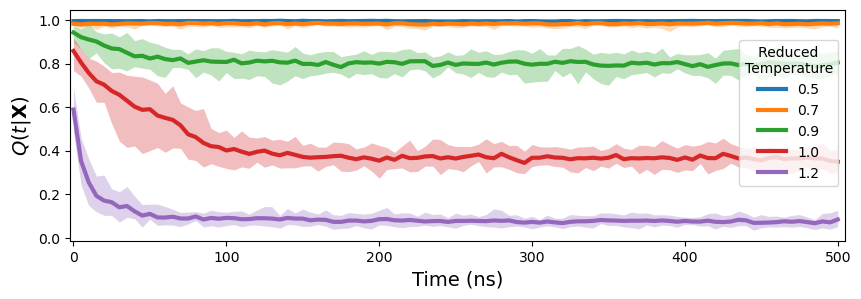

In [172]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl

mean_temp_traj_list, pct_temp_traj_95_list, pct_temp_traj_05_list = [], [], []
X = np.array(list(range(1000)))[:1001:5]
index = 101
for temperature in temperatures:
    temp_traj = np.array(np.array(data[temperature]))
    mean_temp_traj = temp_traj.mean(0)
    std_temp_traj = temp_traj.std(0)
    pct_temp_traj_95 = np.percentile(temp_traj, 95, axis=0)
    pct_temp_traj_05 = np.percentile(temp_traj, 5, axis=0)
    mean_temp_traj_list.append(mean_temp_traj)
    pct_temp_traj_95_list.append(pct_temp_traj_95)
    pct_temp_traj_05_list.append(pct_temp_traj_05)
        
with plt.style.context('tableau-colorblind10'):
    colormap = mpl.cm.tab10.colors

    fig = plt.figure(figsize=(10, 3))
    ax = plt.subplot(1, 1, 1)
    for i, temperature in enumerate(temperatures):
        temp_traj = np.array(np.array(data[temperature]))
        mean_temp_traj = temp_traj.mean(0)
        std_temp_traj = temp_traj.std(0)
        pct_temp_traj_95 =  np.percentile(temp_traj, 95, axis=0)
        pct_temp_traj_05 = np.percentile(temp_traj, 5, axis=0)
        ax.plot(X[:index], mean_temp_traj[:index], color=colormap[i], lw=3, label='{}'.format(temperature))
        ax.fill_between(X[:index], pct_temp_traj_05[:index], pct_temp_traj_95[:index], alpha=0.3, color=colormap[i], linewidth=0)
    
    ax.set_xlim(-2, index * 5)
    ax.set_xlabel("Time (ns)", fontsize=14)
    ax.set_ylabel(r"$Q(t|\mathbf{X})$", fontsize=14)
    ax.legend(loc='upper right', title='   Reduced\nTemperature', bbox_to_anchor=(1., 0.9))
    plt.savefig("plots/flux_comparison.pdf",
                bbox_inches='tight')
    plt.savefig("plots/flux_comparison.svg",
                bbox_inches='tight')
    plt.show()

Text(0, 0.5, 'Mean Absolute Error between $S(t)$ and $Q(t)$')

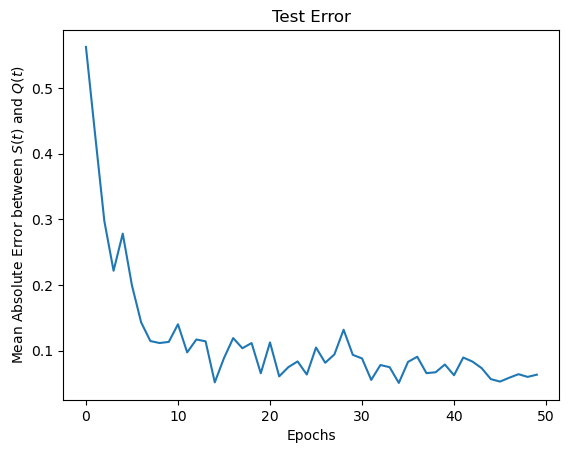

In [40]:
plt.plot(targets[:50])
plt.title("Test Error")
plt.xlabel("Epochs")
plt.ylabel(r"Mean Absolute Error between $S(t)$ and $Q(t|)$")

In [2]:

Mg2 = 0.1
RNA_id = '361D'
rep_id = 1
run_group=2
contacts, contact_matrix = get_atom2residue(RNA_id, Mg2, rep_id, run_group, ailun_simulation=True, path = '/scratch/zheng.hua1/processed/')

In [3]:
temperature=1.0
dcd_path = '/scratch/whitford/A-riboswitch/K50Mg{}/temp_{}/REP{}/A-riboswitch_opensmog_pbc_trajectory.dcd'.format("0.10", temperature, rep_id)
path_xml = '/scratch/whitford/A-riboswitch/K50Mg{0}/temp_{1}/system/A-ribo_opensmog.Mg{0}.mgkcl.xml'.format("0.10", temperature)
t = md.load_dcd(dcd_path, top='/scratch/whitford/A-riboswitch/K50Mg{0}/temp_{1}/system/A-ribo_opensmog.Mg{0}.mgkcl.gro'.format("0.10", temperature))
t_RNA = t.remove_solvent()
atom_contacts = get_contacts(Mg2, RNA_id, path_xml)

In [4]:
temperature=1.0
dcd_path = '/scratch/zheng.hua1/processed/RNA1-Mg10-NEW/simulation_result/output_480D_MG10_temperature1.1/480D_trajectory.dcd_1'
path_xml = '/scratch/zheng.hua1/processed/processed-MG10-CL/480D.OpenSMOG.AA+custom+ions.MGKCL.xml'
t = md.load_dcd(dcd_path, top='/scratch/zheng.hua1/processed/processed-MG10-CL/480D.OpenSMOG.AA+custom+ions.MGKCL.gro')
t_RNA = t.remove_solvent()
atom_contacts = get_contacts(Mg2, RNA_id, path_xml)

In [5]:
                    xyz, residue_type, contacts, contact_matrix \
                      = get_input_data(RNA_id, Mg2, temperature, rep_id, 1)

ValueError: could not broadcast input array from shape (9,) into shape (10,)

In [22]:
atom_contacts = get_contacts(Mg2, RNA_id, path_xml)
atom_dict = get_atom_residue(t_RNA, False)

In [23]:
    indices = []
    for i, j in atom_dict.items():
        for k, v in j.items():
            indices.append([v, i])
    indices_dict = dict(indices)

In [24]:
contacts = [[indices_dict[i], indices_dict[j]] for i, j in atom_contacts]

KeyError: 579